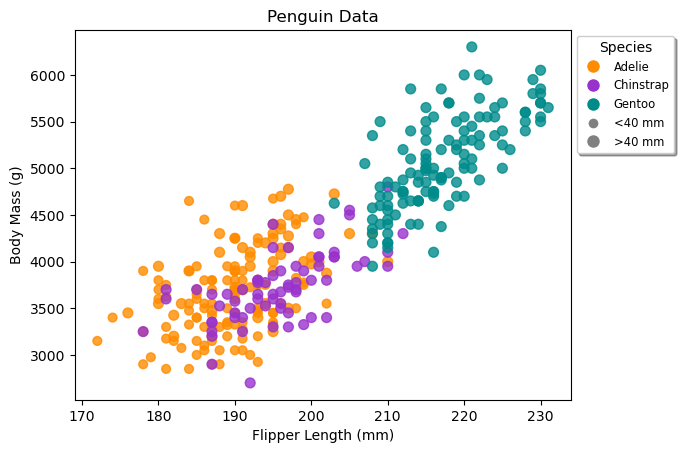

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np

penglings = pd.read_csv("penglings.csv")

color_mapping = {"Adelie": "darkorange", "Chinstrap": "darkorchid", "Gentoo": "darkcyan"}
penglings['size'] = np.where(penglings["bill_length_mm"] <= 40, 40, 50)

fig, ax = plt.subplots()

for species, group in penglings.groupby('species'):
    ax.scatter(
        x=group["flipper_length_mm"],
        y=group["body_mass_g"],
        c=color_mapping[species],
        s=group["size"],
        alpha=0.8,
        label=species
    )

ax.set_xlabel("Flipper Length (mm)")
ax.set_ylabel("Body Mass (g)")
ax.set_title("Penguin Data")

color_legend_handles = [mlines.Line2D([], [], marker='o', color='w', markerfacecolor=color, markersize=10, label=species) for species, color in color_mapping.items()]

size_legend_1 = mlines.Line2D([], [], color="white", marker='o', markersize=8, markerfacecolor="gray", label='<40 mm')
size_legend_2 = mlines.Line2D([], [], color="white", marker='o', markersize=10, markerfacecolor="gray", label='>40 mm')

legend_handles = color_legend_handles + [size_legend_1, size_legend_2]

ax.legend(handles=legend_handles, title="Species", loc='upper left', bbox_to_anchor=(1, 1), shadow=True, fontsize='small')

plt.show()